### Google.colab
Only execute this cell when use on google colab platform (colab).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/Nak007/varclus">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
# Mount with google drive.
from google.colab import drive
drive.mount('/content/dirve')

# Import other libraries required.
!git clone 'http://github.com/Nak007/varclus.git'

# Install `factor_analyzer`
!pip install factor_analyzer

## Example

In [1]:
import numpy as np, pandas as pd, sys
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
try: sys.path.append('/content/varclus')
except: pass

from varclus import *
from cluster_visualization import *

In [3]:
X = pd.DataFrame(load_breast_cancer().data)
X.columns = load_breast_cancer().feature_names

The `maxclus` specifies that no more than `maxclus` clusters be computed. By default, `VariableClustering` splits and optimizes clusters until all clusters have a second eigenvalue less than `maxeigval2`.

In [4]:
vc = VariableClustering(maxclus=10, maxeigval2=0.8).fit(X)

For each cluster, `vc.info` displays as follows:
- the $n^{th}$ cluster (**Cluster**)
- the number of variables in the cluster (**N_Vars**),
- the total explained variation (**Eigval1**), 
- the second eigenvalue (**Eigval2**), 
- the proportion of the total variance explained by the variables in the cluster (**VarProp**),
- the minimum R-Squared with own cluster component (**min_RSO**),
- the maximum R-Squared with with the nearest cluster component (**max_RSN**), and
- the maximum R-Squared Ratio (**max_RSr**).

In [5]:
vc.info

,N_Vars,Eigval1,Eigval2,VarProp,min_RSO,max_RSN,max_RSr
Cluster,,,,,,,
1,8,7.2816,0.5022,0.9102,0.7158,0.7255,1.0352
2,5,4.1322,0.5428,0.8264,0.6507,0.6012,0.5708
3,5,3.6297,0.7629,0.7259,0.4791,0.5342,0.7761
4,2,1.9120,0.0880,0.9560,0.9560,0.1180,0.0499
5,3,1.8150,0.6028,0.6050,0.5990,0.2068,0.4854
6,3,2.9083,0.0663,0.9694,0.9567,0.5897,0.1055
7,2,1.8053,0.1947,0.9027,0.9027,0.3549,0.1509
8,2,1.6998,0.3002,0.8499,0.8499,0.3283,0.2234


`vc.r2` shows how the variables are clustered. It displays the R-square value of each variable with its own cluster and the R-square value with its nearest cluster. The R-square value for a variable with the nearest cluster should be low if the clusters are well separated. The last column displays the ratio of $(1-R^{2}_{own})/(1-R^{2}_{nearsest})$ for each variable. Small values of this ratio indicate good clustering.

In [6]:
vc.r2.head(10)

RS_Own  RS_NC  RS_Ratio
Cluster Variable                                     
1       worst perimeter       0.9795 0.5556    0.0462
        worst radius          0.9702 0.5394    0.0648
        mean perimeter        0.9679 0.5198    0.0669
        mean radius           0.9535 0.5000    0.0930
        mean area             0.9470 0.5848    0.1277
        worst area            0.9360 0.6028    0.1611
        mean concave points   0.8118 0.6179    0.4926
        worst concave points  0.7158 0.7255    1.0352
2       worst compactness     0.9080 0.3480    0.1411
        worst concavity       0.8934 0.4118    0.1813

`vc.labels_` shows the $n^{th}$ cluster that each variable belongs to in each split ($k$). The columns represents layer index or $k-1$.

In [7]:
vc.labels_.sample(5)

,0,1,2,3,4,5,6
worst concave points,1,1,1,1,1,1,1
mean perimeter,1,1,1,1,1,1,1
mean fractal dimension,2,3,3,3,3,3,3
mean area,1,1,1,1,1,1,1
worst radius,1,1,1,1,1,1,1


`vc.plot()` shows the tree diagram (dendrogram) displaying the cluster hierarchy.

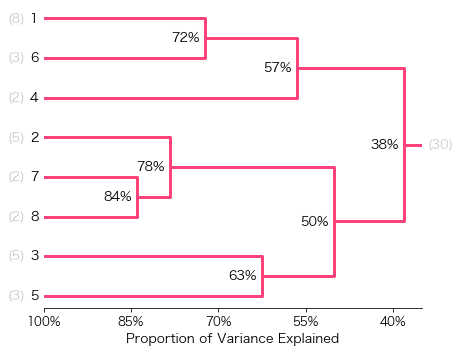

In [8]:
ax = vc.plot()

`vc.clus_corr` and `vc.inter_corr` display the cluster structure and the intercluster correlations, respectively. The former displays the correlation of each variable with each cluster component, while the latter contains the correlations between the cluster components.

In [9]:
vc.clus_corr.head(10)

Cluster Correlations                         \
                                                1       2       3      4   
Cluster Variable                                                           
1       mean area                         -0.9731 -0.4696 -0.1310 0.3112   
        mean concave points               -0.9010 -0.7861 -0.4690 0.2998   
        mean perimeter                    -0.9838 -0.5255 -0.1614 0.3235   
        mean radius                       -0.9765 -0.4786 -0.1157 0.3175   
        worst area                        -0.9675 -0.5029 -0.1251 0.3525   
        worst concave points              -0.8461 -0.8518 -0.4555 0.3350   
        worst perimeter                   -0.9897 -0.5825 -0.1726 0.3698   
        worst radius                      -0.9850 -0.5297 -0.1218 0.3643   
2       mean compactness                  -0.6277 -0.9388 -0.7089 0.2479   
        mean concavity                    -0.7753 -0.8938 -0.6723 0.3080   

                                                            
                                   5       6      7      8  
Cluster Variable                                            
1       mean area             0.1308 -0.7647 0.1582 0.1599  
        mean concave points  -0.0622 -0.7106 0.5297 0.4546  
        mean perimeter        0.1588 -0.7209 0.1883 0.2018  
        mean radius           0.1817 -0.7071 0.1527 0.1690  
        worst area            0.1610 -0.7764 0.2189 0.2095  
        worst concave points  0.1077 -0.5498 0.5530 0.5059  
        worst perimeter       0.1812 -0.7454 0.2503 0.2650  
        worst radius          0.2015 -0.7344 0.2261 0.2328  
2       mean compactness     -0.1769 -0.5086 0.6445 0.6036  
        mean concavity       -0.1515 -0.6466 0.5109 0.4936

In [10]:
vc.inter_corr

Inter-Cluster Correlations                                          \
                                 1       2       3       4       5       6   
Cluster                                                                      
1                           1.0000  0.6118  0.2223 -0.3503 -0.1414  0.7500   
2                           0.6118  1.0000  0.7017 -0.3103  0.0669  0.4285   
3                           0.2223  0.7017  1.0000 -0.0976  0.4612  0.3334   
4                          -0.3503 -0.3103 -0.0976  1.0000 -0.1435 -0.2440   
5                          -0.1414  0.0669  0.4612 -0.1435  1.0000  0.2297   
6                           0.7500  0.4285  0.3334 -0.2440  0.2297  1.0000   
7                          -0.2905 -0.6127 -0.3674  0.0849 -0.1870 -0.2213   
8                          -0.2817 -0.6031 -0.3790  0.1387 -0.2150 -0.2057   

                         
              7       8  
Cluster                  
1       -0.2905 -0.2817  
2       -0.6127 -0.6031  
3       -0.3674 -0.3790  
4        0.0849  0.1387  
5       -0.1870 -0.2150  
6       -0.2213 -0.2057  
7        1.0000  0.5345  
8        0.5345  1.0000

We can use **`cluster_matrix`** to visualize results from **`VariableClustering`** through a matrix of scatter plots.

In [11]:
cluster = 1
index = vc.clus_corr.index.get_level_values(0)==cluster
X0 = X[vc.clus_corr.loc[index].index.get_level_values(1)]
X0.columns = [c.replace(' ','\n') for c in list(X0)]

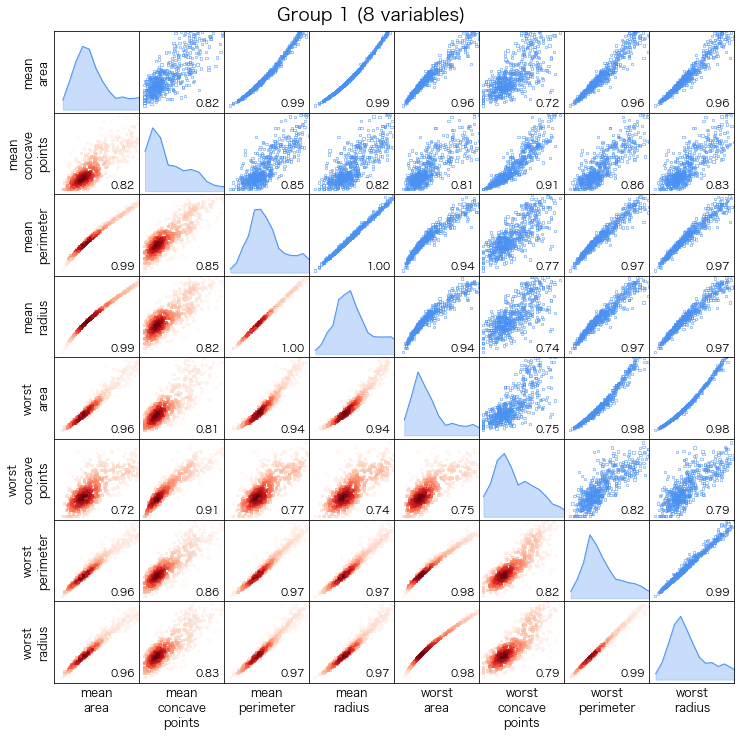

In [12]:
axes = cluster_matrix(X0, off_diagonal="both", scatter_kwds={"cmap":"Reds"}, colors=["#4a91f2"])
plt.gcf().suptitle('Group {} ({:,d} variables)'.format(cluster, X0.shape[1]), fontsize=18)
plt.tight_layout()